In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [131]:
# Data preparation 
df = pd.read_csv("../data/NOAA_Storms.csv")
df.head()

,Datetime,Storm_Status,Latitude,Longitude,Max_Wind,Min_Pressure,Radius_Max_Wind
0,18520826,HU,30.2N,88.6W,100.0,961.0,10.0
1,18540908,HU,31.7N,81.1W,100.0,950.0,40.0
2,18560810,HU,29.2N,91.1W,130.0,934.0,10.0
3,18580916,HU,41.4N,72.0W,70.0,979.0,45.0
4,18671029,HU,18.4N,64.8W,100.0,952.0,5.0


In [133]:
# Data Prep
Y = df["Storm_Status"].values
X = df[["Datetime", "Max_Wind", "Min_Pressure", "Radius_Max_Wind"]].values

Scaler = StandardScaler()

# Normalized feature matrix 
Normalized_X = Scaler.fit_transform(X)
Normalized_X

# Perform PCA with 3 PCs
myPCA = PCA(n_components=3)
data_3d = myPCA.fit_transform(Normalized_X)

print("The percentage of variance for the top 3 PCs are:", 100*myPCA.explained_variance_ratio_)

The percentage of variance for the top 3 PCs are: [61.84669699 20.06715586 16.53907798]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

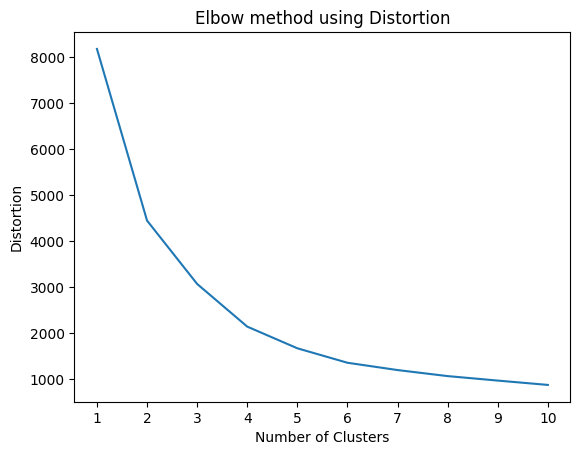

In [134]:
# Elbow Method

Distortion = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_3d)
    Distortion.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), Distortion)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title('Elbow method using Distortion')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters of 2 the average silhouette score is: 0.5359766764927015


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters of 3 the average silhouette score is: 0.4988512002466087


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters of 6 the average silhouette score is: 0.4166298307887197


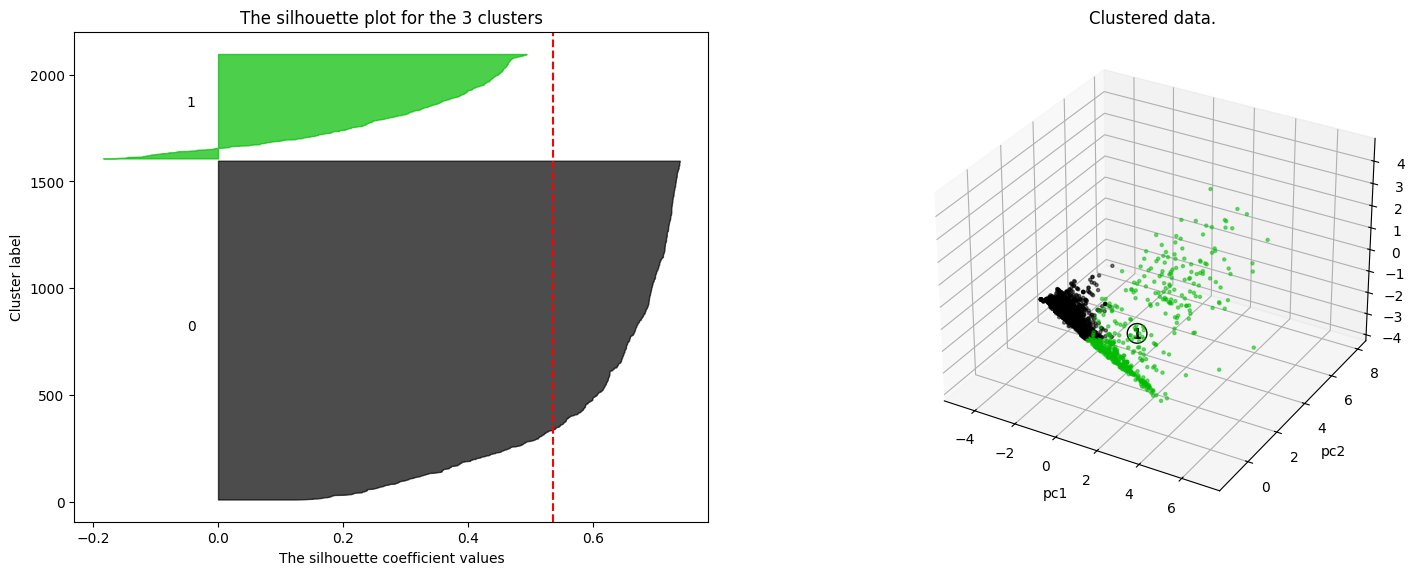

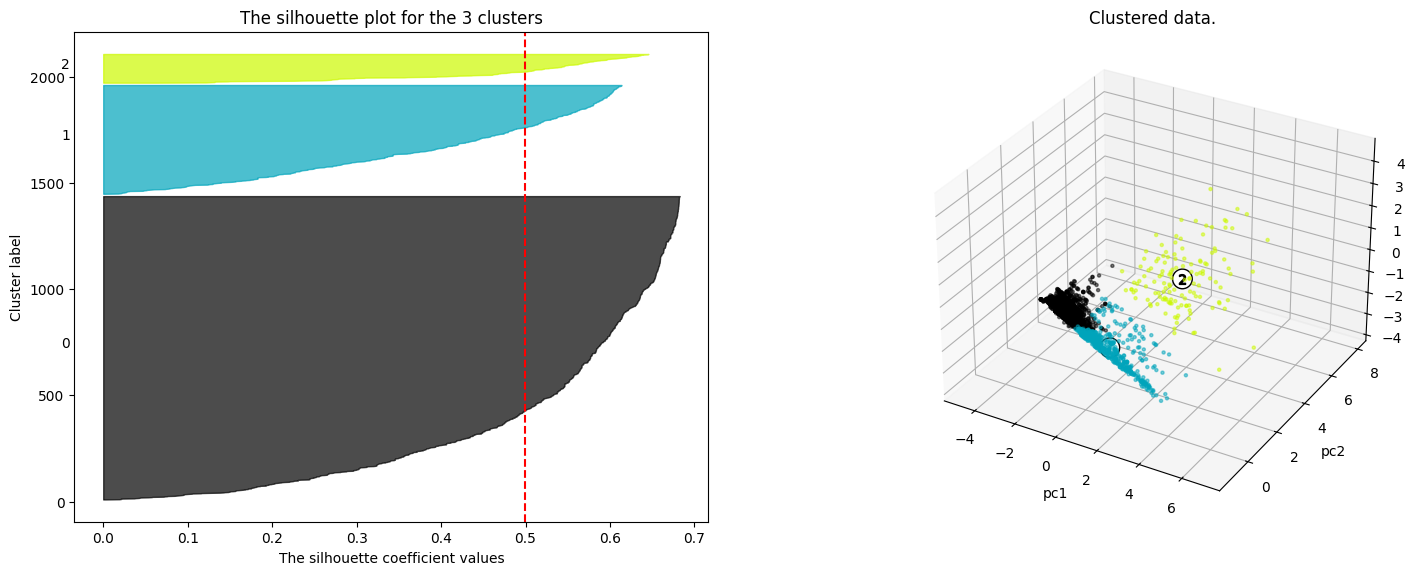

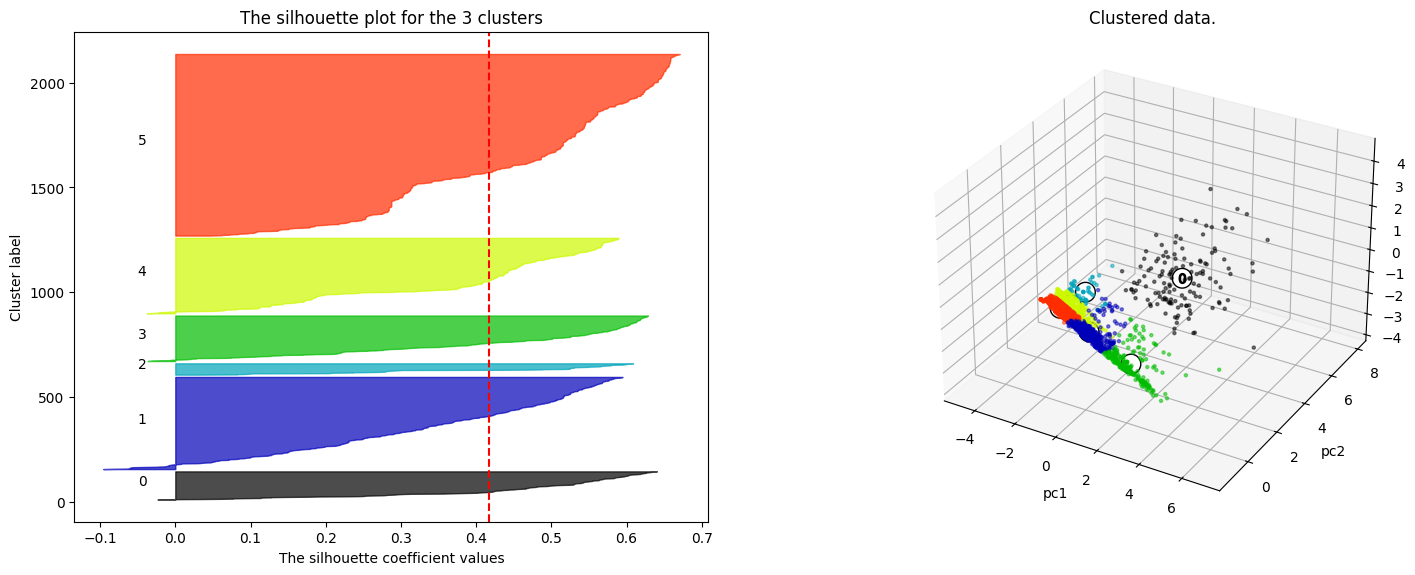

In [94]:
# Plotting K means clustering silhouette score and 3d scatterplot
import matplotlib.cm as cm

# Start K Means Clustering
range_n_clusters = [2, 3,6]

for n_clusters in range_n_clusters:
    # make subplots
    fig = plt.figure()
    ax1=fig.add_subplot(2,2,1)
    ax2=fig.add_subplot(2,2,2, projection ="3d")
    fig.set_size_inches(18, 14)

    # starting k means
    clusters = KMeans(n_clusters = n_clusters)
    cluster_labels = clusters.fit_predict(data_3d)
    centroids = clusters.cluster_centers_
    #print("centroids of k in", n_clusters, "clusters are:",centroids )

    # Calculate average silhouette scores for each n cluster
    silhouette_avg = silhouette_score(data_3d, cluster_labels)
    print("For n_clusters of", n_clusters, "the average silhouette score is:", silhouette_avg)

    # code from sklearn
    sample_silhouette_values = silhouette_samples(data_3d, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the 3 clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vert line for average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # 2nd Plot showing the acutal clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter3D(
        data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], marker=".", alpha=0.5, c=colors
    )

    # Labeling the clusters
    centers = clusters.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter3D(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter3D(c[0], c[1], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Clustered data.")
    ax2.set_xlabel("pc1")
    ax2.set_ylabel("pc2")
    ax2.set_zlabel("pc3")

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering')

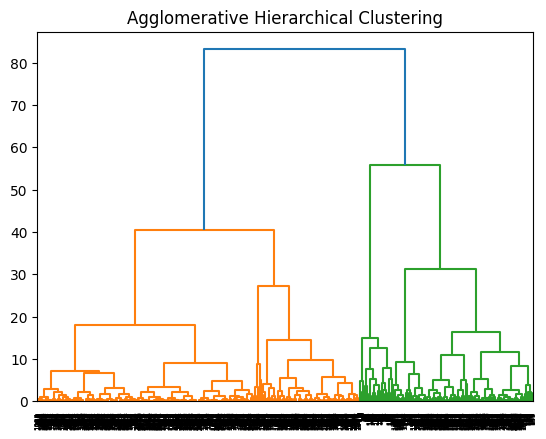

In [135]:
# Agglomerative Hierarchical Clustering (bottom up)
from scipy.cluster.hierarchy import dendrogram, linkage

Clusters = linkage(data_3d, method='ward')
dendrogram(Clusters)
plt.title("Agglomerative Hierarchical Clustering")

In [153]:
# DBSCAN, density clustering
from sklearn.cluster import DBSCAN

density = DBSCAN(eps=.2, min_samples=10, metric='euclidean').fit(data_3d)
labels = density.labels_
print(set(labels))

{0, 1, 2, 3, 4, -1}


In [155]:
# Trying another setting
density1 = DBSCAN(eps=1, min_samples=20, metric='euclidean').fit(data_3d)
labels1 = density1.labels_
print(set(labels1))

{0, -1}


In [156]:
# Trying another setting
density2 = DBSCAN(eps=.1, min_samples=20, metric='euclidean').fit(data_3d)
labels2 = density2.labels_
print(set(labels2))

{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


DBSCAN is harder to read than other methods, as there are 2 parameters(maximum distance and min samples) that you are playing with.